## **GOALS**

The goal of this project is to predict the Heart Disease presence within the patients in this datasets. 

This goal hopefully will be achieved through the simple Random Forest Classification Model & K - Nearest Neighbors Model. With maybe some EDA along the way.

The variables are explained below : 

1. age: The person's age 
2. sex: The person's gender (1 = Male, 0 = Female)
3. cp: The chest pain experienced (4 types)
4. trestbps: The person's resting blood pressure
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: If the person's fasting blood sugar > 120 mg/dl (1 = True; 0 = False)
7. restecg: Resting electrocardiographic measurement
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = Yes; 0 = No)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease diagnose (0 = No, 1 = Yes)

## **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **LOAD DATASET - OVERVIEW**

First let's load the dataset, and check the datatype for each variables.

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **SOME EDA**

Let's do some EDA to see the pattern within this dataset. I'll be using only the continous variables.

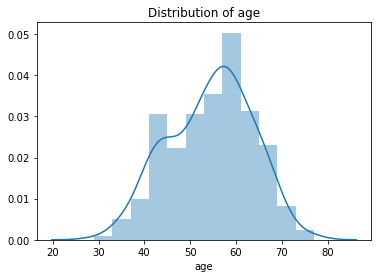

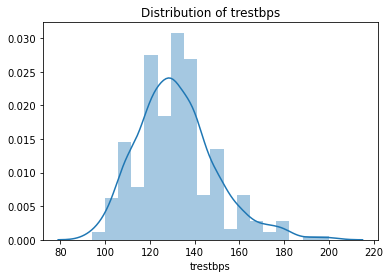

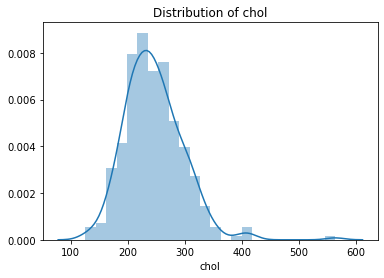

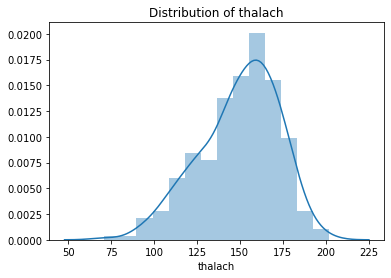

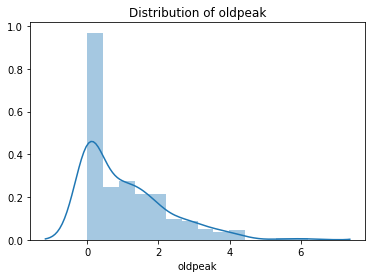

In [5]:
for i in df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]:
    sns.distplot(df[i])
    plt.title('Distribution of ' + i)
    plt.show()

Text(0.5, 1.0, 'Count Of Positive Cases by Age')

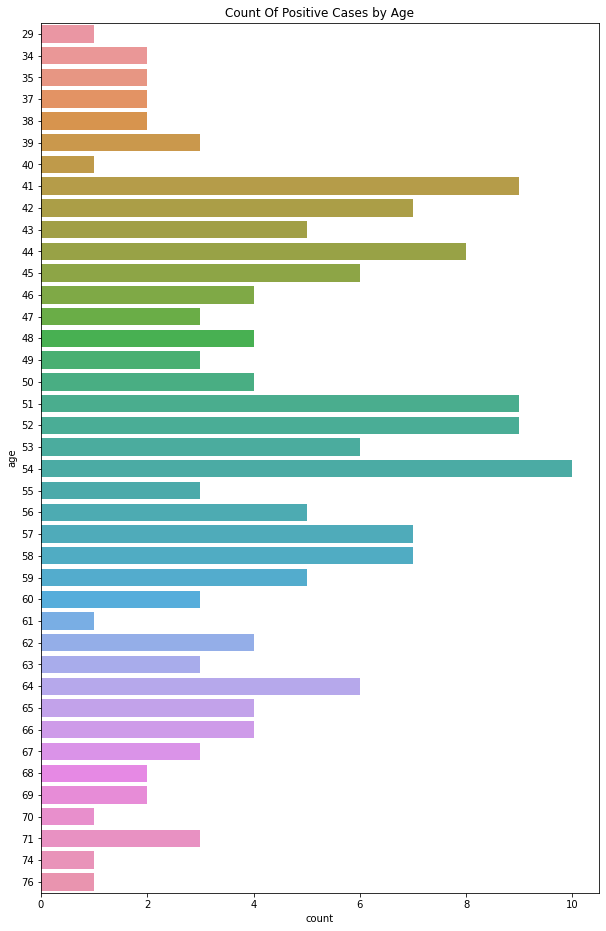

In [6]:
plt.figure(figsize = (10, 16))
sns.countplot(y = df[df['target']==1]['age'])
plt.title('Count Of Positive Cases by Age')

## **GETTING DUMMIES**

Now let's get to the Labelling to our categorical variable, I'll use the pd.get_dummies to achieve this.

In [7]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df_heart = pd.concat(frames, axis = 1)
df_heart = df_heart.drop(columns = ['cp', 'thal', 'slope'])

In [8]:
df_heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [9]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   ca        303 non-null    int64  
 10  target    303 non-null    int64  
 11  cp_0      303 non-null    uint8  
 12  cp_1      303 non-null    uint8  
 13  cp_2      303 non-null    uint8  
 14  cp_3      303 non-null    uint8  
 15  thal_0    303 non-null    uint8  
 16  thal_1    303 non-null    uint8  
 17  thal_2    303 non-null    uint8  
 18  thal_3    303 non-null    uint8  
 19  slope_0   303 non-null    uint8  
 20  slope_1   303 non-null    uint8 

## **SPLITTING DATA**

Now before fitting our models, I want to split it to 80% Train and 20% Test data.

In [10]:
x = df_heart.drop(['target'], axis = 1)
y = df_heart.target.values

In [11]:
# Split the data with 80% Train size

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=0)

In [12]:
x_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
74,43,0,122,213,0,1,165,0,0.2,0,...,0,1,0,0,0,1,0,0,1,0
153,66,0,146,278,0,0,152,0,0.0,1,...,0,1,0,0,0,1,0,0,1,0
64,58,1,140,211,1,0,165,0,0.0,0,...,0,1,0,0,0,1,0,0,0,1
296,63,0,124,197,0,1,136,1,0.0,0,...,0,0,0,0,0,1,0,0,1,0
287,57,1,154,232,0,0,164,0,0.0,1,...,1,0,0,0,0,1,0,0,0,1


In [13]:
x_test.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
225,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
152,64,1,170,227,0,0,155,0,0.6,0,...,0,0,1,0,0,0,1,0,1,0
228,59,1,170,288,0,0,159,0,0.2,0,...,0,0,1,0,0,0,1,0,1,0
201,60,1,125,258,0,0,141,1,2.8,1,...,0,0,0,0,0,0,1,0,1,0
52,62,1,130,231,0,1,146,0,1.8,3,...,0,1,0,0,0,0,1,0,1,0


In [14]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [15]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

From this point below, we'll start building the Machine Learning Model and fitting it to our train data, then start to predict it to test data.

## **RANDOM FOREST CLASSIFIER**

In [16]:
# Model Fitting

RFC = RandomForestClassifier(n_estimators = 2000, min_samples_split= 2, min_samples_leaf = 1, max_depth = 25)
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=2000)

In [17]:
# Random Forest Classifier predict

yp_RFC = RFC.predict(x_test)

In [18]:
# Confusion Matrix

cm_RFC = confusion_matrix(y_test,yp_RFC)
cm_RFC

array([[24,  3],
       [ 4, 30]])

In [19]:
# Labels for Confusion Matrix

labels = ['No Disease', 'Have Disease']

              precision    recall  f1-score   support

  No Disease       0.86      0.89      0.87        27
Have Disease       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



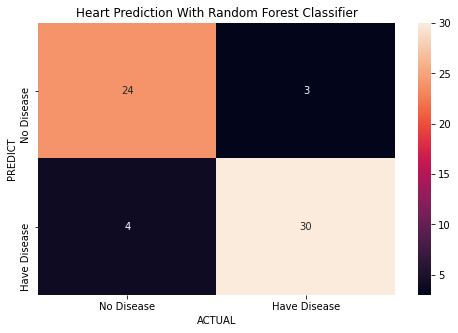

In [20]:
# Printing Classification Report and Showing Confusion Matrix

print(classification_report(y_test, yp_RFC, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Heart Prediction With Random Forest Classifier')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [21]:
# Printing Score

print(RFC.score(x_test,y_test))

0.8852459016393442


In [22]:
# Classification Report for Summary

report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

# **K Nearest Neighbors**

In [23]:
# Determining the K-Value

k = round(len(x_train)**0.5)+1
k

17

In [24]:
# Fitting Model

KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [25]:
# KNN Predict

yp_KNN = KNN.predict(x_test)

In [26]:
# Confusion Matrix

cm_KNN = confusion_matrix(y_test,yp_KNN)
cm_KNN

array([[19,  8],
       [ 9, 25]])

              precision    recall  f1-score   support

  No Disease       0.68      0.70      0.69        27
Have Disease       0.76      0.74      0.75        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



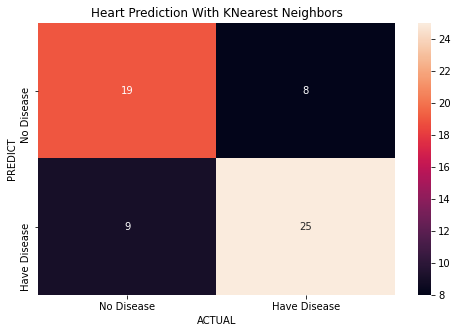

In [27]:
# Printing Classification Report and Showing Confusion Matrix 

print(classification_report(y_test, yp_KNN, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Heart Prediction With KNearest Neighbors')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [28]:
# Printing Score

print(KNN.score(x_test,y_test))

0.7213114754098361


In [29]:
# Classification Report for Summary

report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

## **SUMMARY**

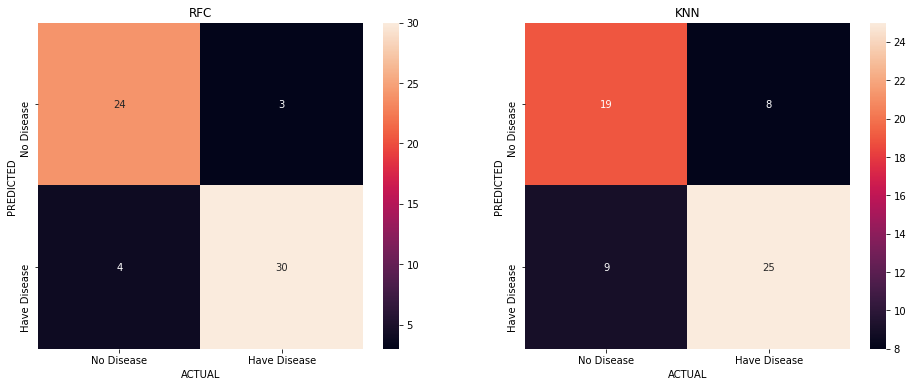

In [30]:
# Showing the Confusion Matrix for both models

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC'), ax2.set_title('KNN')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [31]:
print('RFC Model : ', RFC.score(x_test,y_test))
print('KNN Model : ', KNN.score(x_test,y_test))

RFC Model :  0.8852459016393442
KNN Model :  0.7213114754098361


In [32]:
# Printing Classification Report Summary
pd.concat([report_RFC, report_KNN], keys = ['RFC MODEL', 'KNN MODEL'])

precision    recall  f1-score    support
RFC MODEL No Disease     0.857143  0.888889  0.872727  27.000000
          Have Disease   0.909091  0.882353  0.895522  34.000000
          accuracy       0.885246  0.885246  0.885246   0.885246
          macro avg      0.883117  0.885621  0.884125  61.000000
          weighted avg   0.886098  0.885246  0.885433  61.000000
KNN MODEL No Disease     0.678571  0.703704  0.690909  27.000000
          Have Disease   0.757576  0.735294  0.746269  34.000000
          accuracy       0.721311  0.721311  0.721311   0.721311
          macro avg      0.718074  0.719499  0.718589  61.000000
          weighted avg   0.722607  0.721311  0.721765  61.000000

From the two models score comparison above, the Random Forest Classifier is having 0.88 score, while the K - Nearest Neighbors score is only 0.72. The F1-Score, Precision and Recall for Random Forest Classifier is also much higher than K - Nearest Neighbors. Therefore we can see that in predicting this case with the comparison between the two models above, Random Forest Classifier will be a better choice than the K-Nearest Neighbors.